In [ ]:
#!pip install pycaret

In [ ]:
#!pip install numba==0.53

In [88]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [161]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
import numpy as np
from pycaret.anomaly import * 
mpl.rcParams['figure.dpi'] = 300
# Loading Dataset
numeric = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
categorical = ['Channel','Region']
replace_dict = { "Channel": {1: "Horeca", 2: "Retail"},
                 "Region":  {1: "Lisbon", 2: "Oporto", 3: "Other"} }
data = get_data('wholesale', verbose = False)
data.replace(replace_dict, inplace = True)
# PyCaret environment setup
anomaly = setup(data, silent=True, session_id = 8477)

Description                 Value
0                               session_id                  8477
1                            Original Data              (440, 8)
2                           Missing Values                 False
3                         Numeric Features                     6
4                     Categorical Features                     2
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data             (440, 11)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  9d2b
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [162]:
data.head(10)

Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  Retail  Other  12669   9656     7561     214              2674        1338
1  Retail  Other   7057   9810     9568    1762              3293        1776
2  Retail  Other   6353   8808     7684    2405              3516        7844
3  Horeca  Other  13265   1196     4221    6404               507        1788
4  Retail  Other  22615   5410     7198    3915              1777        5185
5  Retail  Other   9413   8259     5126     666              1795        1451
6  Retail  Other  12126   3199     6975     480              3140         545
7  Retail  Other   7579   4956     9426    1669              3321        2566
8  Horeca  Other   5963   3648     6192     425              1716         750
9  Retail  Other   6006  11093    18881    1159              7425        2098

In [91]:
data.shape

(440, 8)

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

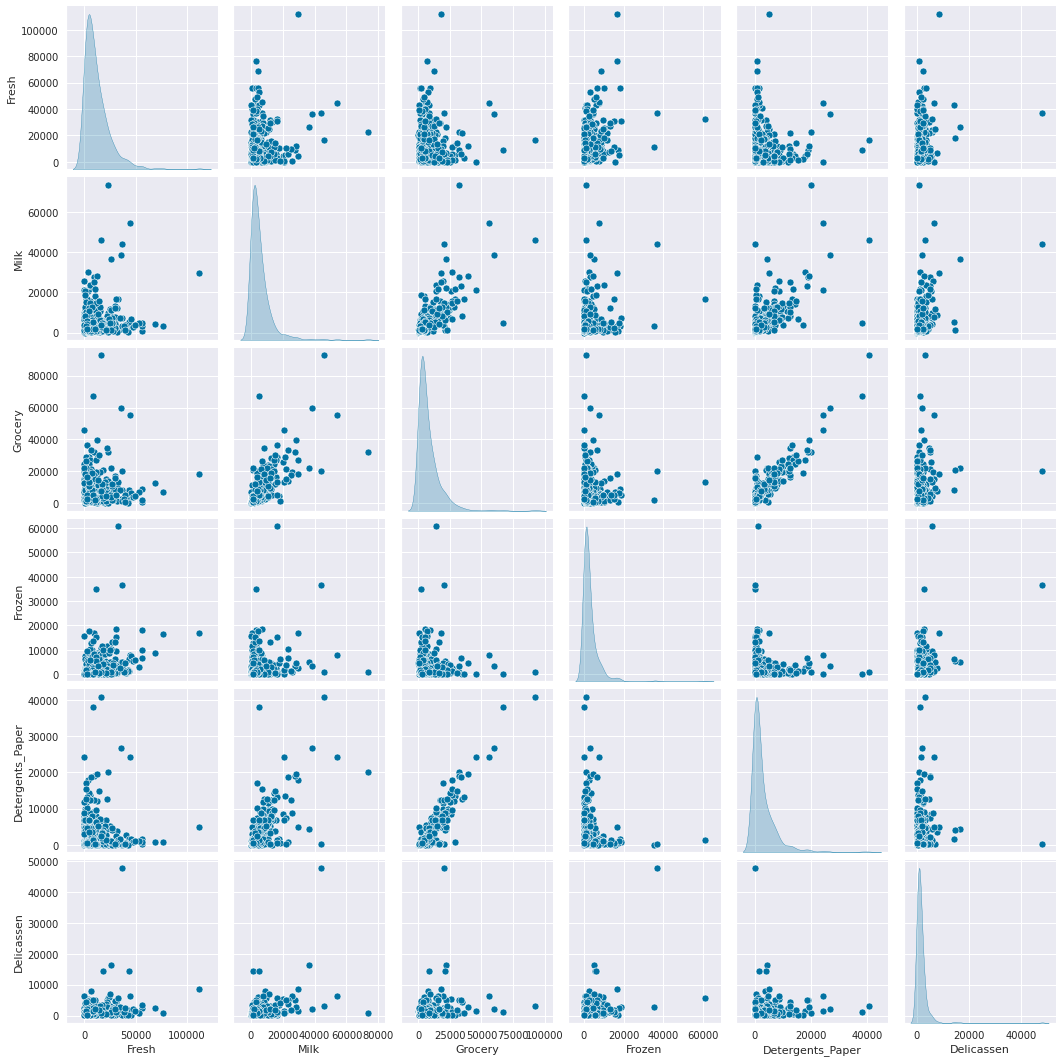

In [93]:
sns.pairplot(data, diag_kind="kde")

In [94]:
data.Channel.value_counts(), data.Region.value_counts()

(Horeca    298
 Retail    142
 Name: Channel, dtype: int64, Other     316
 Lisbon     77
 Oporto     47
 Name: Region, dtype: int64)

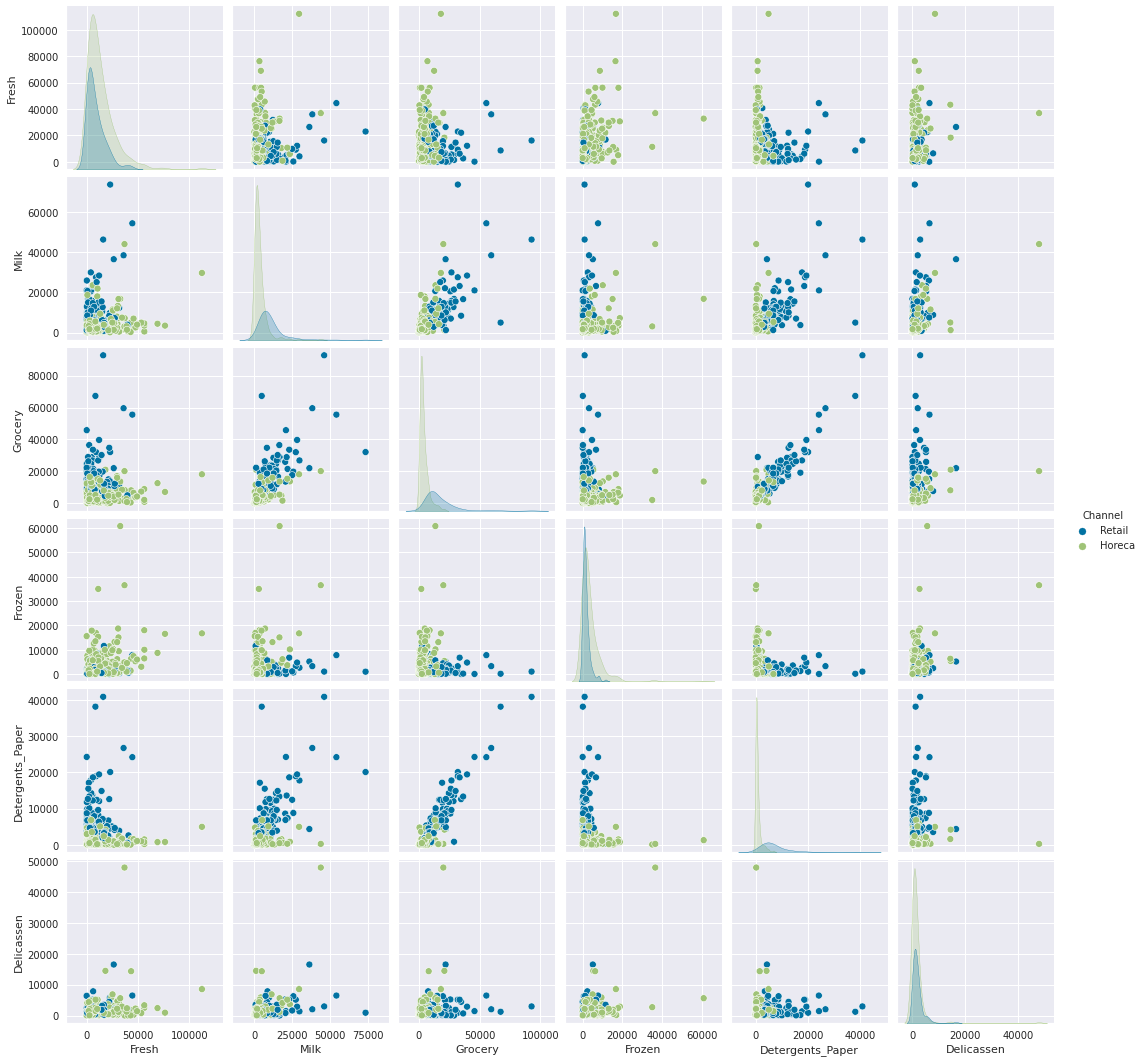

In [95]:
sns.pairplot(data, hue='Channel')

In [96]:
# Create Local Outlier Factor model with an outlier proportion of 10% and assign it to model variable
lof = create_model('lof', fraction = 0.1)
print(lof)

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)
INFO:logs:create_model() succesfully completed......................................


LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)


In [97]:
plot_model(lof)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [98]:
plot_model(lof, plot = 'tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [99]:
plot_model(lof, plot= 'umap')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [100]:
# Assign anomaly labels and scores to the data_assigned variable
unseen_predictions = predict_model(lof, data=data)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2), ml_usecase=MLUsecase.ANOMALY)


Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0  Retail  Other  12669  9656     7561     214              2674        1338   
1  Retail  Other   7057  9810     9568    1762              3293        1776   
2  Retail  Other   6353  8808     7684    2405              3516        7844   
3  Horeca  Other  13265  1196     4221    6404               507        1788   
4  Retail  Other  22615  5410     7198    3915              1777        5185   

   Anomaly  Anomaly_Score  
0        0       1.108555  
1        0       1.024941  
2        0       1.375147  
3        0       1.172098  
4        0       1.165064

In [101]:
# Create new dataset of outliers named data_outliers
data_outliers = unseen_predictions[unseen_predictions['Anomaly']== 1]

In [102]:
# Print first 5 instances of the outlier dataset
data_outliers.head()

Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23  Retail  Other  26373  36423    22019    5154              4337   
47  Retail  Other  44466  54259    55571    7782             24171   
56  Retail  Other   4098  29892    26866    2616             17740   
61  Retail  Other  35942  38369    59598    3254             26701   
65  Retail  Other     85  20959    45828      36             24231   

    Delicassen  Anomaly  Anomaly_Score  
23       16523        1       2.192904  
47        6465        1       3.214190  
56        1340        1       1.476948  
61        2017        1       2.597997  
65        1423        1       2.028683

In [103]:
unseen_predictions.groupby(["Channel", "Region",'Anomaly']).size()

Channel  Region  Anomaly
Horeca   Lisbon  0           55
                 1            4
         Oporto  0           26
                 1            2
         Other   0          195
                 1           16
Retail   Lisbon  0           16
                 1            2
         Oporto  0           16
                 1            3
         Other   0           94
                 1           11
dtype: int64

In [104]:
unseen_predictions['Anomaly'].value_counts()

0    402
1     38
Name: Anomaly, dtype: int64

In [105]:
# Please run other algorithms  - svm, abod, Iforest
models()

INFO:logs:gpu_param set to False


Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [106]:
# SVM, ABOD, IForest, Bonus point: KNN

## SVM Implementation

In [163]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num = data.select_dtypes(include=numerics)

In [164]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(data_num)
print(X)

[[0.11294004 0.13072723 0.08146416 0.0031063  0.0654272  0.02784731]
 [0.06289903 0.13282409 0.10309667 0.02854842 0.08058985 0.03698373]
 [0.05662161 0.11918086 0.08278992 0.03911643 0.08605232 0.16355861]
 ...
 [0.1295431  0.21013575 0.32594285 0.00677142 0.36346267 0.03888194]
 [0.091727   0.02622442 0.02402535 0.01664914 0.00404174 0.04426366]
 [0.02482434 0.02237109 0.02702178 0.00065742 0.01161082 0.00102211]]


In [109]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt

In [110]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.03, shrinking=True, tol=0.001, verbose=False)


In [111]:
data_num.head(1)

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338

In [112]:
svm.fit(X)
pred = svm.predict(X)

In [113]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [114]:
anom_index = where(pred==-1)
values = X[anom_index]

In [115]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   9]
 [  1 431]]


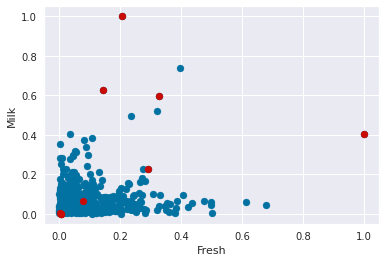

In [121]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

In [117]:
anomaly_values = data.iloc[np.where(pred==-1)]
print(anomaly_values)

    Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
85   Retail   Other   16117  46197    92780    1026             40827   
86   Retail   Other   22925  73498    32114     987             20070   
97   Horeca   Other     403    254      610     774                54   
98   Horeca   Other     503    112      778     895                56   
154  Horeca   Other     622     55      137      75                 7   
181  Horeca   Other  112151  29627    18148   16745              4948   
183  Horeca   Other   36847  43950    20170   36534               239   
325  Horeca  Oporto   32717  16784    13626   60869              1272   
333  Retail  Oporto    8565   4980    67298     131             38102   

     Delicassen  
85         2944  
86          903  
97           63  
98          132  
154           8  
181        8550  
183       47943  
325        5609  
333        1215  


### ABOD Implementation

In [122]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from scipy import stats 
import matplotlib

In [133]:
data.head(1)

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  Retail  Other  12669  9656     7561     214              2674        1338

In [134]:
cols = ['Fresh','Milk']
data[cols].head()

Fresh  Milk
0  12669  9656
1   7057  9810
2   6353  8808
3  13265  1196
4  22615  5410

In [135]:
minmax = MinMaxScaler(feature_range=(0, 1))
data[cols] = minmax.fit_transform(data[cols])
data[cols].head()

Fresh      Milk
0  0.112940  0.130727
1  0.062899  0.132824
2  0.056622  0.119181
3  0.118254  0.015536
4  0.201626  0.072914

In [137]:
x1 = data['Fresh'].values.reshape(-1, 1)
x2 = data['Milk'].values.reshape(-1, 1)

In [138]:
X_new = np.concatenate((x1, x2), axis=1)

In [139]:
outliers_fraction = 0.1
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

In [158]:
def outlier_detection(clf):
    clf.fit(X_new)
    
    scores_pred = clf.decision_function(X_new) * -1
    y_pred = clf.predict(X_new)
    
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred==1)
    
    plt.figure(figsize=(8, 8))
    
    df1 = data
    df1['outlier'] = y_pred.tolist()
    
    # Sales: feature 1, Profit: feature 2
    inlier_sales = np.array(df1['Fresh'][df1['outlier']==0].values.reshape(-1, 1))
    inlier_profit = np.array(df1['Milk'][df1['outlier']==0].values.reshape(-1, 1))
    
    outlier_sales = df1['Fresh'][df1['outlier']==1].values.reshape(-1, 1)
    outlier_profit = df1['Milk'][df1['outlier']==1].values.reshape(-1, 1)
    
    print('Outliers: {}, Inliers: {}'.format(n_outliers, n_inliers))
    
    threshold = stats.scoreatpercentile(scores_pred, 100*outliers_fraction)
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
    b = plt.scatter(inlier_sales, inlier_profit, c='white', s=20, edgecolor='k')

    c = plt.scatter(outlier_sales, outlier_profit, c='black', s=20, edgecolor='k')

    plt.axis('tight')   
    plt.legend([a.collections[0], b, c],
               ['learned decision function', 'inliers','outliers'],
               prop=matplotlib.font_manager.FontProperties(size=20),
               loc='lower right')      
    plt.xlim((0, 1))
    plt.ylim((0, 1));

In [159]:
clf = ABOD(contamination=outliers_fraction)

Outliers: 41, Inliers: 399


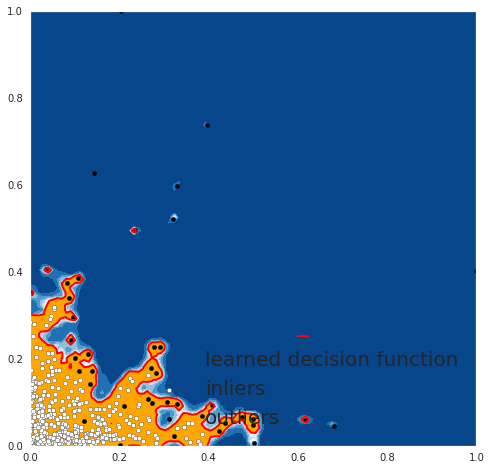

In [160]:
outlier_detection(clf)

In [165]:
abod = ABOD(contamination=0.1) 
abod.fit(X)
pred_abod = abod.predict(X)

In [166]:
unique, counts = np.unique(pred_abod, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 396]
 [  1  44]]


In [167]:
anomaly_values_abod = data.iloc[np.where(pred==1)]
print(anomaly_values_abod)

    Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Retail  Other  12669   9656     7561     214              2674   
1    Retail  Other   7057   9810     9568    1762              3293   
2    Retail  Other   6353   8808     7684    2405              3516   
3    Horeca  Other  13265   1196     4221    6404               507   
4    Retail  Other  22615   5410     7198    3915              1777   
..      ...    ...    ...    ...      ...     ...               ...   
435  Horeca  Other  29703  12051    16027   13135               182   
436  Horeca  Other  39228   1431      764    4510                93   
437  Retail  Other  14531  15488    30243     437             14841   
438  Horeca  Other  10290   1981     2232    1038               168   
439  Horeca  Other   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436

### KNN Implementation

In [124]:
knn = KNN(contamination=0.1) 
knn.fit(X)
pred_knn = knn.predict(X)

In [125]:
unique, counts = np.unique(pred_knn, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 400]
 [  1  40]]


In [126]:
pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [127]:
anomaly_values_knn = data.iloc[np.where(pred==1)]
print(anomaly_values_knn)

    Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Retail  Other  12669   9656     7561     214              2674   
1    Retail  Other   7057   9810     9568    1762              3293   
2    Retail  Other   6353   8808     7684    2405              3516   
3    Horeca  Other  13265   1196     4221    6404               507   
4    Retail  Other  22615   5410     7198    3915              1777   
..      ...    ...    ...    ...      ...     ...               ...   
435  Horeca  Other  29703  12051    16027   13135               182   
436  Horeca  Other  39228   1431      764    4510                93   
437  Retail  Other  14531  15488    30243     437             14841   
438  Horeca  Other  10290   1981     2232    1038               168   
439  Horeca  Other   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436

### IFOREST Implementation

In [128]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.1, max_samples=40, behaviour='new') 
isft.fit(X)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=40, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [129]:
pred_if = isft.predict(X)

In [130]:
unique, counts = np.unique(pred_if, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 396]
 [  1  44]]


In [131]:
anomaly_values_if = data.iloc[np.where(pred==1)]
print(anomaly_values_if)

    Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Retail  Other  12669   9656     7561     214              2674   
1    Retail  Other   7057   9810     9568    1762              3293   
2    Retail  Other   6353   8808     7684    2405              3516   
3    Horeca  Other  13265   1196     4221    6404               507   
4    Retail  Other  22615   5410     7198    3915              1777   
..      ...    ...    ...    ...      ...     ...               ...   
435  Horeca  Other  29703  12051    16027   13135               182   
436  Horeca  Other  39228   1431      764    4510                93   
437  Retail  Other  14531  15488    30243     437             14841   
438  Horeca  Other  10290   1981     2232    1038               168   
439  Horeca  Other   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436